In [1]:
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind
    """
    c_ind = sum(yi * xi**2 for xi, yi in zip(xs, ys))
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind
    """
    c_ind = sum(yi * xi for xi, yi in zip(xs, ys))
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind
    """
    c_ind = sum(ys)
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    return (c_2, c_1, c_0, c_ind)


In [2]:
def ajustar_min_cuadrados(xs: list, ys: list, gradiente: list) -> list:
    """
    Ajusta una curva a los puntos dados ``xs`` y ``ys`` usando el método de mínimos cuadrados.

    Parameters
    ----------
    xs : list
        Lista de valores de x.
    ys : list
        Lista de valores de y.
    gradiente : list
        Lista de funciones que retornan los coeficientes de las derivadas parciales.

    Returns
    -------
    list
        Lista con los parámetros ajustados [a_2, a_1, a_0].
    """
    from numpy.linalg import solve

    # Construir el sistema de ecuaciones lineales
    A = []
    B = []
    for g in gradiente:
        coefs = g(xs, ys)
        A.append(coefs[:-1])
        B.append(coefs[-1])
    
    # Resolver el sistema
    coefs = solve(A, B)
    return coefs.tolist()


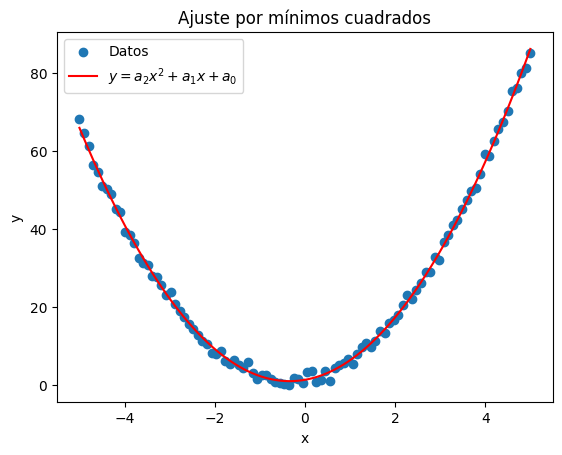

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de datos
xs2 = np.linspace(-5, 5, 100)
ys2 = 3 * xs2**2 + 2 * xs2 + 1 + np.random.randn(100)

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

# Definir la función cuadrática
def cuadratica(x, pars):
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Generar valores para la gráfica
x = np.linspace(-5, 5, 100)
y = [cuadratica(xi, pars) for xi in x]

# Graficar
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()
